| Problem | Formula|Search Domain|
|---      |----    |----|
|ZDT1|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g} \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT2|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-(f1/g)^2 \\\end{cases}} \text{  where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT3|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g}-(f_1/g)sin(10\pi f_1) \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|VU1|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=\frac{1}{x^2_1+x^2_2+1}\\f_{2}\left(x_1, x_2\right)={x^2_1+3x^2_2+1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$ |
|VU2|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=x_1+x_2+1\\f_{2}\left(x_1, x_2\right)={x^2_1+2x^2_2-1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$ |
|Kur1|${\text{Min}}={\begin{cases}f_{1}\left(x_1,x_2,....,x_n\right)=\sum_{i=1}^{n-1}-10exp^{-0.2\sqrt{x^2_{i}+x^2_{i+1}}}\\f_{2}\left(x_1,x_2,....,x_n\right)=\sum^{n}_{i=1}\|x_i\|^{0.8}+5sinx_i^3\\\end{cases}}$|$-5.05\leq{x_i}\leq{5}, i=1..n$|
|TKLY1|${\text{Min}}={\begin{cases}f_{1}\left(x_1\right)=x_1+0.1\\f_{2}\left(x_1,x_2,x_3,x_4\right)={\frac{1}{x_1+0.1}\Pi_{i=2}^{4}[2.0-exp(-(\frac{x_i-0.1}{0.004})^2)-0.8exp(-(\frac{x_i-0.9}{0.4})^2)]}\end{cases}}$|$0\leq{x_1,x_2,x_3,x_4}\leq1$ |
|LTDZ1 |${\text{Maximum}}={\begin{cases}f_{1}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)cos(x_2\pi/2)\\f_{2}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)sin(x_2\pi/2)\\f_{3}\left(x_1,x_3\right)=3-(1+x_3)sin(x_1\pi/2)\end{cases}}$|$0\leq{x_1,x_2,x_3}\leq1$|
|SK2 |${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2+3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|
|SK2_typo|${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2-3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|



# Kur1

In [ ]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator

ref_point = None
def calculate_hv(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    start_time = time.time()
    hv = metric.do(F)
    exc_time = time.time() - start_time
    return [hv,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Iteration', 'Objectives', 'n_variables',
    'exec_time','solutions','ref_point', 'hv',
    'hv_exc_time',  
    'lower_bound', 'upper_bound','solution_path']]
    return output_result

def nadir_deal_point(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    return [approx_ideal,approx_nadir]
def nadir_deal_point_result(result):
    get = result.apply(nadir_deal_point, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['approx_ideal','approx_nadir'])
    final_result = pd.concat([result, df],axis=1)
    return final_result

def igd(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    igd_plus = get_performance_indicator("igd+", pf)
    igd_value = igd_plus.do(F)
    return igd_value

In [49]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
result = pd.read_csv('/Users/wuyoscar/Documents/Project/MOOP/Result/Kursawe_Result')
result.loc[:,'path'] = result['path'].str[29:].values
result = result.drop(columns=['xl','xu'])
kur1_2 = result.loc[result['n_variables']==2].reset_index(drop=True)
kur1_3 = result.loc[result['n_variables']==3].reset_index(drop=True)
kur1_4 = result.loc[result['n_variables']==4].reset_index(drop=True)
kur1_5 = result.loc[result['n_variables']==5].reset_index(drop=True)


# Kur1 with two variables

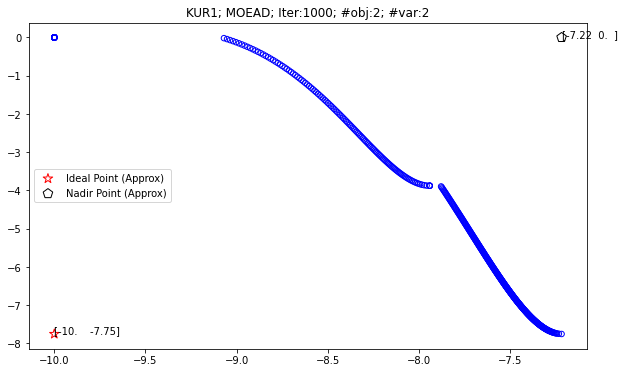

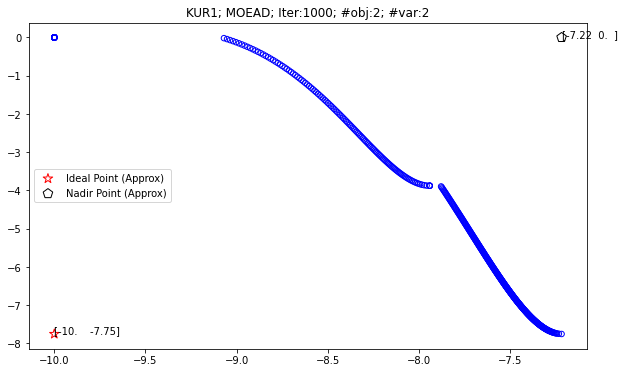

In [82]:
for i in range(len(kur1_2)-2,len(kur1_2)):
    path = os.path.join(os.path.dirname(os.getcwd()),kur1_2['path'][i])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    plt.figure(figsize=(10, 6))
    plt.text(approx_ideal[0], approx_ideal[1], str(np.round(approx_ideal,2)))
    plt.text(approx_nadir[0], approx_nadir[1], str(np.round(approx_nadir,2)))
    plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    plt.title(f"{kur1_2['Problem'][i]}; {kur1_2['Alg_name'][i]}; Iter:{kur1_2['Iteration'][i]}; #obj:{kur1_2['Objectives'][i]}; #var:{kur1_2['n_variables'][i]}")
    plt.legend()
    plt.show()




# Kur1 with three variables

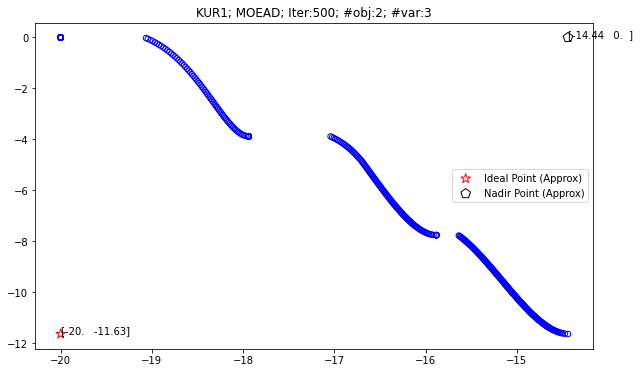

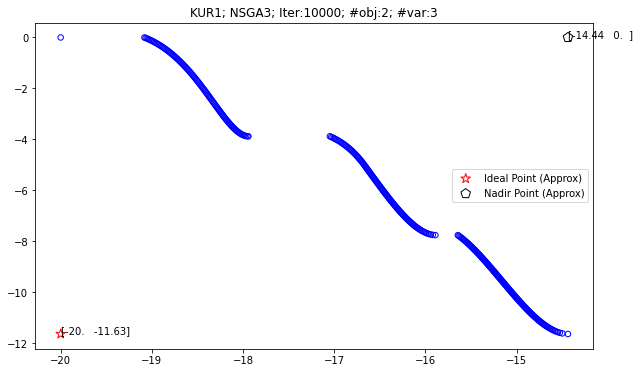

In [83]:
for i in range(len(kur1_3)-2,len(kur1_3)):
    path = os.path.join(os.path.dirname(os.getcwd()),kur1_3['path'][i])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    plt.figure(figsize=(10, 6))
    plt.text(approx_ideal[0], approx_ideal[1], str(np.round(approx_ideal,2)))
    plt.text(approx_nadir[0], approx_nadir[1], str(np.round(approx_nadir,2)))
    plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    plt.title(f"{kur1_3['Problem'][i]}; {kur1_3['Alg_name'][i]}; Iter:{kur1_3['Iteration'][i]}; #obj:{kur1_3['Objectives'][i]}; #var:{kur1_3['n_variables'][i]}")
    plt.legend()
    plt.show()


# Kur1 with four variables

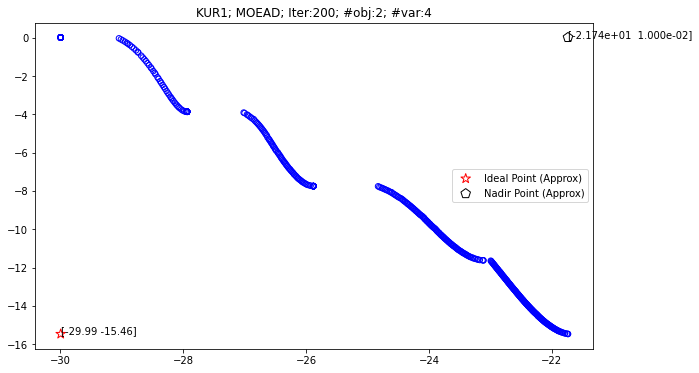

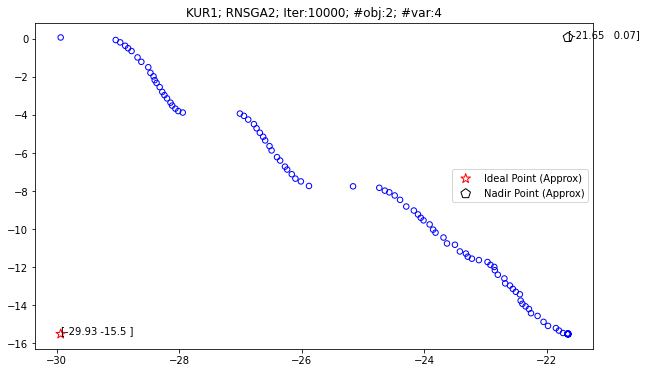

In [84]:
for i in range(len(kur1_4)-2,len(kur1_4)):
    path = os.path.join(os.path.dirname(os.getcwd()),kur1_4['path'][i])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    plt.figure(figsize=(10, 6))
    plt.text(approx_ideal[0], approx_ideal[1], str(np.round(approx_ideal,2)))
    plt.text(approx_nadir[0], approx_nadir[1], str(np.round(approx_nadir,2)))
    plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    plt.title(f"{kur1_4['Problem'][i]}; {kur1_4['Alg_name'][i]}; Iter:{kur1_4['Iteration'][i]}; #obj:{kur1_4['Objectives'][i]}; #var:{kur1_4['n_variables'][i]}")
    plt.legend()
    plt.show()


# Kur1 with five variables

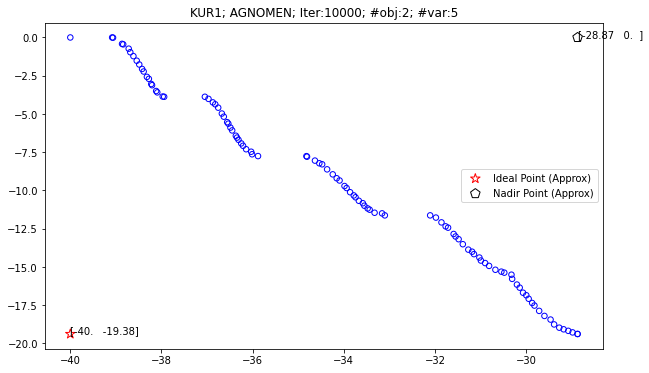

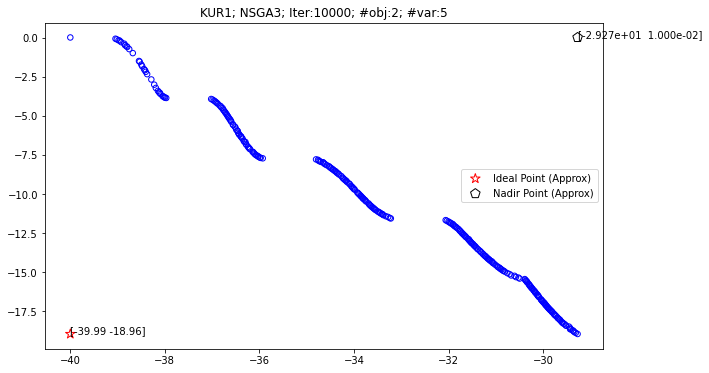

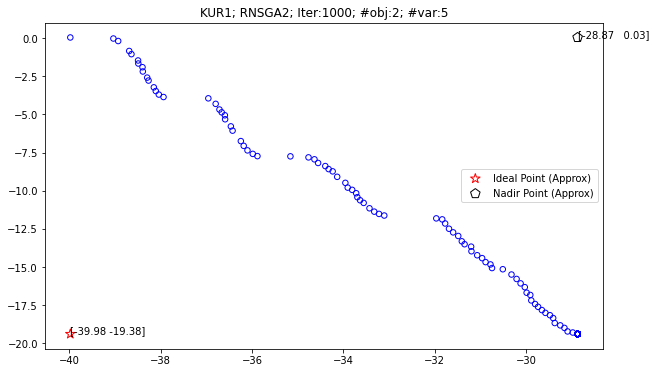

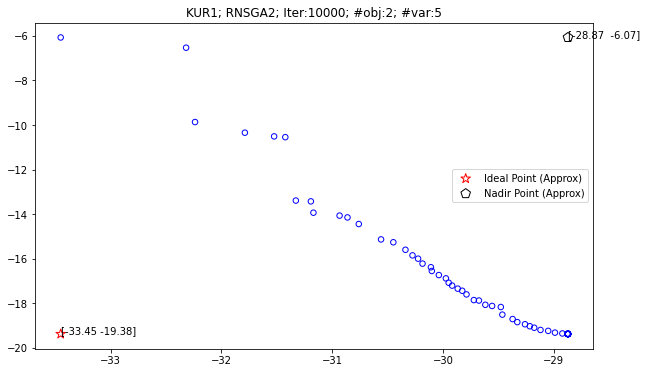

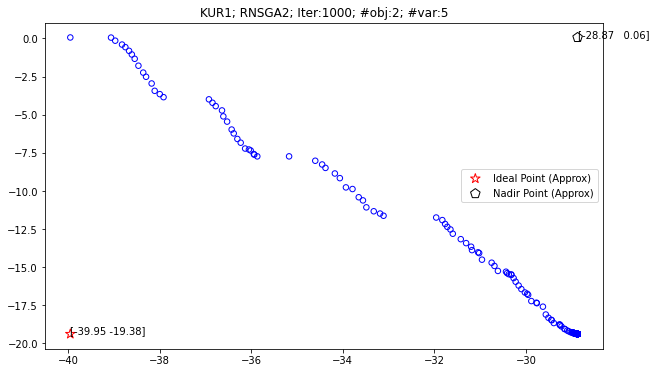

In [86]:
for i in range(len(kur1_5)-5,len(kur1_5)):
    path = os.path.join(os.path.dirname(os.getcwd()),kur1_5['path'][i])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    plt.figure(figsize=(10, 6))
    plt.text(approx_ideal[0], approx_ideal[1], str(np.round(approx_ideal,2)))
    plt.text(approx_nadir[0], approx_nadir[1], str(np.round(approx_nadir,2)))
    plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    plt.title(f"{kur1_5['Problem'][i]}; {kur1_5['Alg_name'][i]}; Iter:{kur1_5['Iteration'][i]}; #obj:{kur1_5['Objectives'][i]}; #var:{kur1_5['n_variables'][i]}")
    plt.legend()
    plt.show()